In [1]:
import matplotlib.pyplot as plt
from torchfsm.operator import Laplacian,ConservativeConvection,Operator,SpatialDerivative
from torchfsm.mesh import MeshGrid
import torch
import numpy as np
import yaml

def KSConservative(coef_conv:float=1.0,coef_lap:float=1.0,coef_hyconv:float=1.0) ->Operator:
    return -coef_conv*0.5*ConservativeConvection()-coef_lap*Laplacian()-coef_hyconv*SpatialDerivative(0,4)

ks_conservative=KSConservative()
mesh=MeshGrid([(0,64,128)],device="cuda")
ks_conservative.register_mesh(mesh,n_channel=1)

# Train

(50, 51, 1, 128)
3.3711472 -3.4218733


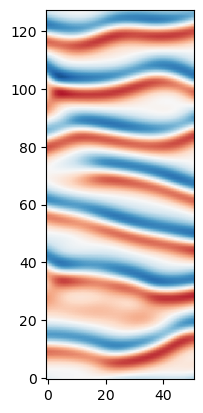

In [22]:
ini=torch.randn((50,1,128),device="cuda")
traj=ks_conservative.integrate(ini,mesh,dt=0.5,step=100,trajectory=True)
traj=traj.cpu().numpy()[:,50:,...]
print(traj.shape)
plt.imshow(traj[10,:,0,:].T,vmin=-3.5,vmax=3.5, cmap="RdBu_r", origin="lower")
print(np.max(traj),np.min(traj))
np.save("./ks_conservative_train_vrange3p5.npy",traj)

# Test

(30, 151, 1, 128)
3.424567 -3.451417


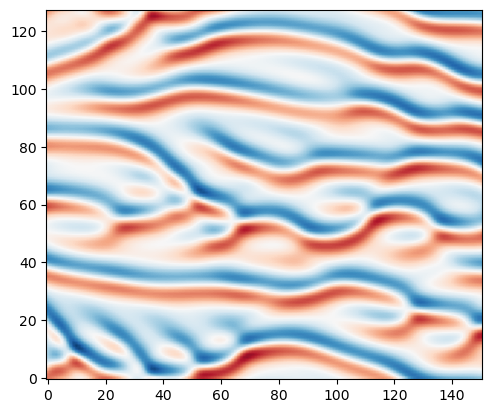

In [23]:
ini=torch.randn((30,1,128),device="cuda")
traj=ks_conservative.integrate(ini,mesh,dt=0.5,step=200,trajectory=True)
traj=traj.cpu().numpy()[:,50:,...]
print(traj.shape)
plt.imshow(traj[10,:,0,:].T,vmin=-3.5,vmax=3.5, cmap="RdBu_r", origin="lower")
print(np.max(traj),np.min(traj))
np.save("./ks_conservative_test_vrange3p5.npy",traj)

In [4]:
yaml.dump(
    {
        "train": "ks_conservative_train.npy",
        "test": "ks_conservative_test.npy",
        "mesh": [list(i) for i in mesh.mesh_info],
        "dt": 0.5,
        "step": [100,200],
        "vrange":[-3.5,3.5]
    },
    open("ks_conservative.yaml","w")
)

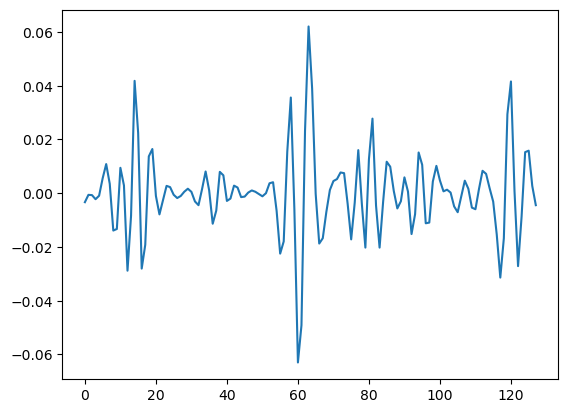

In [28]:
dat=np.load("./ks_conservative_train_vrange3p5.npy")
dat=torch.from_numpy(dat).to("cuda")
u_0=dat[15:16,25,...]
u_1=dat[15:16,26,...]
dudt=(u_1-u_0)/0.5
u_mid=0.5*(u_0+u_1)
dudt-ks_conservative(u_mid)
plt.plot((dudt-ks_conservative(u_mid)).cpu().numpy()[0,0,:])

The loss functions of many learning problems contain multiple additive terms that can disagree and yield conflicting update directions. For Physics-Informed Neural Networks (PINNs), loss terms on initial/boundary conditions and physics equations are particularly interesting as they are well-established as highly difficult tasks. To improve learning the challenging multi-objective task posed by PINNs, we propose the ConFIG method, which provides conflict-free updates by ensuring a positive dot product between the final update and each loss-specific gradient. It also maintains consistent optimization rates for all loss terms and dynamically adjusts gradient magnitudes based on conflict levels. We additionally leverage momentum to accelerate optimizations by alternating the back-propagation of different loss terms. We provide a mathematical proof showing the convergence of the ConFIG method, and it is evaluated across a range of challenging PINN scenarios. ConFIG consistently shows superior performance and runtime compared to baseline methods. We also test the proposed method in a classic multi-task benchmark, where the ConFIG method likewise exhibits a highly promising performance. Source code will be made available upon acceptance.

In [13]:
class A():

    def my_fuction(self,a):
        print(a)

class B(A):

    def my_fuction(self,a,b):
        super().my_fuction(a+b)

b=B()

b.my_fuction(1,2)

3
